## Library Imports

In [ ]:
# Numpy and Pandas
import numpy as np
import pandas as pd

# Vizualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# Machine learning algorithms
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Machine learning pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

# Regression Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Ignore ConvergenceWarning messages
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# Check the fitted_model
from sklearn.exceptions import NotFittedError

# Save python obect to disk
import pickle

## Exploratory Analysis

In [ ]:
df = pd.read_csv('Mixed2set.csv')
df.head()

,Voltage,Current,Temperature,WhAccu
0,4.18498,-0.03576,23.76583,0.00000
1,4.18413,-0.07407,23.76583,-0.00001
2,4.18380,-0.08173,23.76583,-0.00001
3,4.18363,-0.08428,23.76583,-0.00002
4,4.18363,-0.08428,23.76583,-0.00003


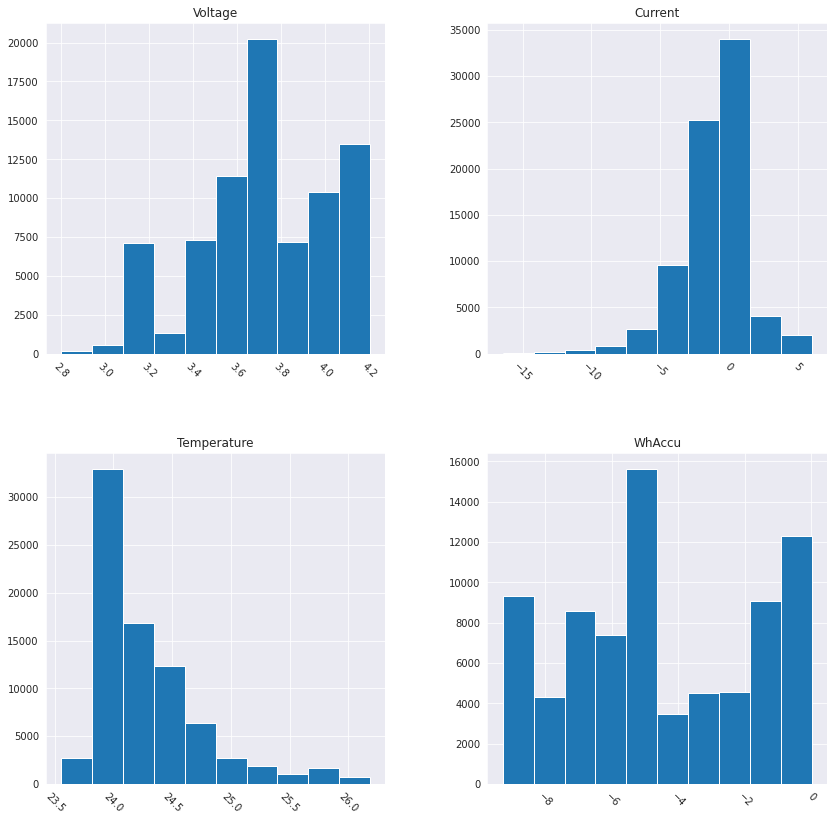

In [ ]:
df.hist(figsize=(14,14), xrot=-45)
plt.show()

In [ ]:
df.describe()

,Voltage,Current,Temperature,WhAccu
count,79172.000000,79172.000000,79172.000000,79172.000000
mean,3.726264,-1.177492,24.300851,-4.539380
std,0.289833,2.453153,0.440250,2.872360
min,2.799420,-16.448340,23.555510,-9.274380
25%,3.548148,-2.370190,23.976150,-6.691880
50%,3.710310,-0.679390,24.186460,-5.113325
75%,3.987930,0.000000,24.501940,-1.678320
max,4.204170,6.002170,26.184470,0.005520


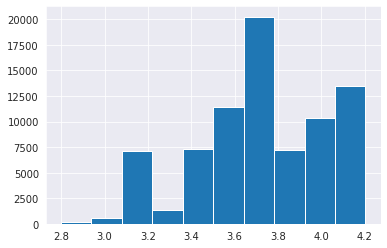

In [ ]:
df.Voltage.hist()
plt.show()

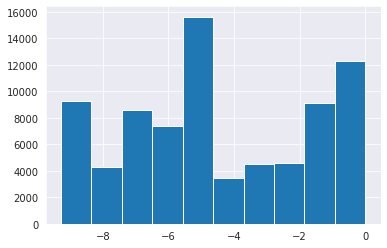

In [ ]:
df.WhAccu.hist()
plt.show()

In [ ]:
df.shape

(79172, 4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


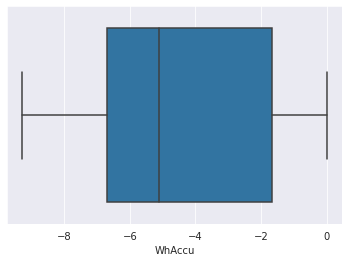

In [ ]:
sns.boxplot(df.WhAccu)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


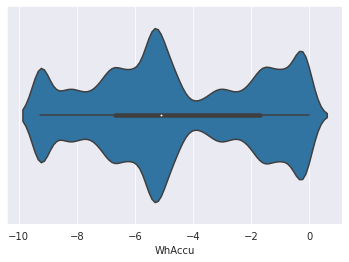

In [ ]:
sns.violinplot('WhAccu', data=df)
plt.show()

In [ ]:
correlations = df.corr()
correlations

,Voltage,Current,Temperature,WhAccu
Voltage,1.000000,0.241330,-0.579303,0.967371
Current,0.241330,1.000000,-0.134336,0.050945
Temperature,-0.579303,-0.134336,1.000000,-0.513933
WhAccu,0.967371,0.050945,-0.513933,1.000000


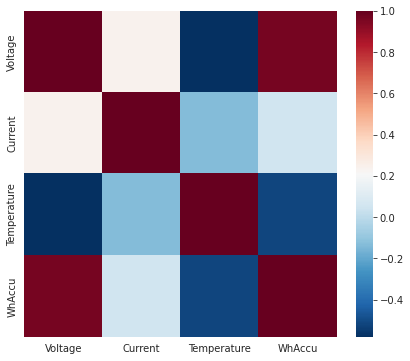

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(correlations, cmap='RdBu_r')
plt.show()

## Data Cleaning

In [ ]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(79172, 4)
(73595, 4)


## Feature Engineering

In [ ]:
V_num = 100
V = []
V[:V_num] = df.Voltage[:V_num]
for i in range(V_num,len(df.Voltage)):
    V.append(np.mean(df.Voltage[i-V_num:i]))
df['Vmean'] = V
df.tail()

,Voltage,Current,Temperature,WhAccu,Vmean
78998,3.21183,0.0,24.08130,-9.27438,3.206406
79011,3.21183,0.0,23.97615,-9.27438,3.206524
79075,3.21200,0.0,23.97615,-9.27438,3.206640
79102,3.21200,0.0,24.08130,-9.27438,3.206756
79152,3.21217,0.0,24.08130,-9.27438,3.206871


## Algorithm Selection

In [ ]:
df['Temperature'] = df['Temperature'].astype(float)

y = df.WhAccu
X = df.drop('WhAccu', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)
pipelines = {

    'pr'    : make_pipeline(PolynomialFeatures(degree = 4), LinearRegression()),
    'gb'    : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123)),
    'svm'   : make_pipeline(StandardScaler(), SVR(kernel = 'rbf')),
    'dt'    : make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=123)),
    'rf'    : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'mlp'   : make_pipeline(StandardScaler(), MLPRegressor(random_state=123))
}

In [ ]:
# Check that we have all 5 model families, and that they are all pipelines
for key, value in pipelines.items():
    print( key, type(value) )

pr <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>
svm <class 'sklearn.pipeline.Pipeline'>
dt <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
mlp <class 'sklearn.pipeline.Pipeline'>


In [ ]:
MLPRegressor()

MLPRegressor()

In [ ]:

pr_hyperparameters = {
}

gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [10, 20],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

svm_hyperparameters = {
    'svr__C': [1.0],
    'svr__gamma': ['scale']
}

dt_hyperparameters = {
    'decisiontreeregressor__max_features': ['auto', 'sqrt', 0.33],
}

# Random forest hyperparameters
rf_hyperparameters = {
    'randomforestregressor__n_estimators' : [10, 20],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

# Boosted tree hyperparameters

# MLP hyperparameters
mlp_hyperparameters = {
    'mlpregressor__hidden_layer_sizes': [(100,)],
    'mlpregressor__activation': ['logistic', 'relu']
}

# Create hyperparameters dictionary
hyperparameters = {
    'pr': pr_hyperparameters,
    'gb' : gb_hyperparameters,
    'svm': svm_hyperparameters,
    'dt': dt_hyperparameters,
    'rf' : rf_hyperparameters,
    'mlp': mlp_hyperparameters
}

In [ ]:
for key in ['pr', 'gb', 'svm', 'dt', 'rf', 'mlp']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

pr was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
svm was found in hyperparameters, and it is a grid.
dt was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
mlp was found in hyperparameters, and it is a grid.


In [ ]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)

    # Fit model on X_train, y_train
    model.fit(X_train, y_train)

    # Store model in fitted_models[name]
    fitted_models[name] = model

    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

pr has been fitted.
gb has been fitted.
svm has been fitted.
dt has been fitted.
rf has been fitted.
mlp has been fitted.


In [ ]:
# pipeline = make_pipeline(StandardScaler(), MLPRegressor(random_state=123))
# model = GridSearchCV(pipeline , hyperparameters['mlp'], cv=10, n_jobs=-1)

# # Fit model on X_train, y_train
# model.fit(X_train, y_train)

# # Print '{name} has been fitted'
# print('mlp', 'has been fitted.')

In [ ]:
for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print (name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

pr has been fitted.
gb has been fitted.
svm has been fitted.
dt has been fitted.
rf has been fitted.
mlp has been fitted.


## Model Selection

In [ ]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

pr 0.9967446462470253
gb 0.9942028701549717
svm 0.9971800732526725
dt 0.9989542128732435
rf 0.9995453985617775
mlp 0.9971895233852359


In [ ]:
for name,model in fitted_models.items():
    pred = fitted_models[name].predict(X_test)
    print(name)
    print('R2:', r2_score(y_test, pred))
    print('MAE:', mean_absolute_error(y_test, pred))

pr
R2: 0.9968023907911783
MAE: 0.11173614619670523
gb
R2: 0.9942633305395342
MAE: 0.1447193144799045
svm
R2: 0.9972164175006951
MAE: 0.10351002679683595
dt
R2: 0.9991116811178181
MAE: 0.012127485684045883
rf
R2: 0.9996239508467087
MAE: 0.016554050282898948
mlp
R2: 0.9972263135537608
MAE: 0.10090294292496983


In [ ]:
# RF wins!

K FOLD and GRID SEARCH

In [ ]:
#from sklearn.model_selection import cross_val_score
#for name,model in fitted_models.items():
 # accuracies = cross_val_score(estimator = fitted_models[name], X = X_train, y = y_train, cv = 10)
  #print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
  #print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
#from sklearn.model_selection import GridSearchCV
#parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              #{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
#grid_search = GridSearchCV(estimator = fitted_models[name],
                           #param_grid = parameters,
                           #scoring = 'accuracy',
                           #cv = 10,
                           #n_jobs = -1)
#grid_search.fit(X_train, y_train)
#best_accuracy = grid_search.best_score_
#best_parameters = grid_search.best_params_
#print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
#print("Best Parameters:", best_parameters)

## Insight & Analysis

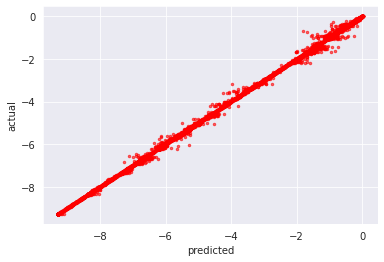

In [ ]:
rf_pred = fitted_models['rf'].predict(X_test)
plt.scatter(rf_pred, y_test,color = '#ff0000',alpha=0.6,s=6)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

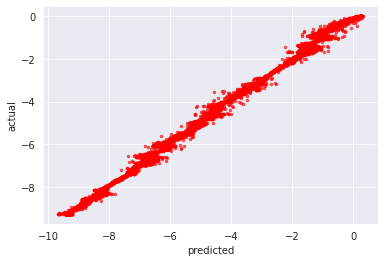

In [ ]:
mlp_pred = fitted_models['mlp'].predict(X_test)
plt.scatter(mlp_pred, y_test,color = '#ff0000',alpha=0.6,s=6)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

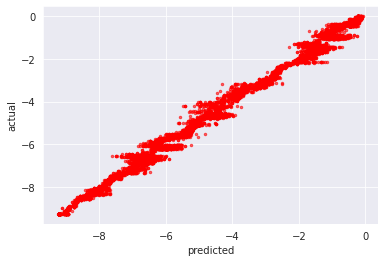

In [ ]:
gb_pred = fitted_models['gb'].predict(X_test)
plt.scatter(gb_pred, y_test,color = '#ff0000',alpha=0.6,s=6)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

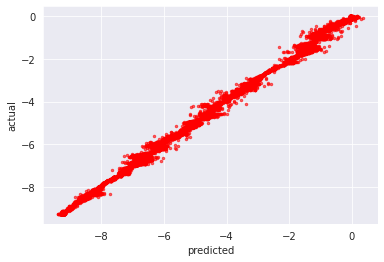

In [ ]:
svm_pred = fitted_models['svm'].predict(X_test)
plt.scatter(svm_pred, y_test,color = '#ff0000',alpha=0.6,s=6)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

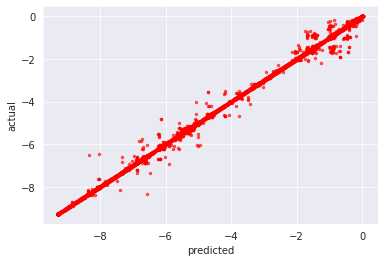

In [ ]:
dt_pred = fitted_models['dt'].predict(X_test)
plt.scatter(dt_pred, y_test,color = '#ff0000',alpha=0.6,s=6)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

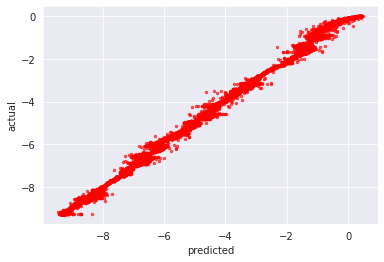

In [ ]:
pr_pred = fitted_models['pr'].predict(X_test)
plt.scatter(pr_pred, y_test,color = '#ff0000',alpha=0.6,s=6)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()